# I. Load data from .e

In [1]:
from read_fem import *

In [2]:
output_list_no_defects=[['simulation_files/No0_intact.e'],[r"No Defect"]]
output_list_weak_Gc = [
    ['simulation_files/No1_0p95.e', 'simulation_files/No2_0p98.e'],
    [
        r"Weakened $G_c$ Zone at Depth $\approx 0.05\,R_d$",
        r"Weakened $G_c$ Zone at Depth $\approx 0.02\,R_d$"
    ]
]

output_list_initd = [
    [
        'simulation_files/No1_0p95_initd.e',
        'simulation_files/No2_0p98_initd.e',
        'simulation_files/No3_vert_sections.e',
        'simulation_files/No3_vert_sections2.e'
    ],
    [
        r"Prescribed Damage at Depth $\approx 0.05\,R_d$",
        r"Prescribed Damage at Depth $\approx 0.02\,R_d$",
        r"Aligned Initial Cracks (Type 1)",
        r"Aligned Initial Cracks (Type 2)"
    ]
]

output_list=[output_list_weak_Gc[0]+output_list_initd[0],output_list_weak_Gc[1]+output_list_initd[1]]
node_variable_idx=[1, 2 ,3 ,4]
node_var_labels=[[r"Temperature $\theta\;(^{\circ}C)$", ""],
                 [r"Phase Field Fracture Damage", ""],
                 [r"Displacement $u_x$ (m)", ""],
                 [r"Displacement $u_y$ (m)", ""]]

element_variable_idx=[3,]#12]
elt_var_labels=[[r"Energy Release Rate $G_c(x,y)$ MPa $\cdot$m", ""],
                ]
output_list


[['simulation_files/No1_0p95.e',
  'simulation_files/No2_0p98.e',
  'simulation_files/No1_0p95_initd.e',
  'simulation_files/No2_0p98_initd.e',
  'simulation_files/No3_vert_sections.e',
  'simulation_files/No3_vert_sections2.e'],
 ['Weakened $G_c$ Zone at Depth $\\approx 0.05\\,R_d$',
  'Weakened $G_c$ Zone at Depth $\\approx 0.02\\,R_d$',
  'Prescribed Damage at Depth $\\approx 0.05\\,R_d$',
  'Prescribed Damage at Depth $\\approx 0.02\\,R_d$',
  'Aligned Initial Cracks (Type 1)',
  'Aligned Initial Cracks (Type 2)']]

In [4]:
profiles = [read_vars(e_name, node_variable_idx, element_variable_idx) for e_name in output_list[0]]
model_index=3
nodes, connect_components, global_connection, node_vars, elet_vars,times=profiles[model_index]

['time_whole', 'eb_status', 'eb_prop1', 'ns_status', 'ns_prop1', 'ss_status', 'ss_prop1', 'coordx', 'coordy', 'eb_names', 'ns_names', 'ss_names', 'coor_names', 'node_num_map', 'connect1', 'connect2', 'elem_num_map', 'elem_ss1', 'side_ss1', 'elem_ss2', 'side_ss2', 'elem_ss3', 'side_ss3', 'elem_ss4', 'side_ss4', 'elem_ss5', 'side_ss5', 'node_ns1', 'node_ns2', 'node_ns3', 'node_ns4', 'node_ns5', 'node_ns6', 'name_nod_var', 'vals_nod_var1', 'vals_nod_var2', 'vals_nod_var3', 'vals_nod_var4', 'name_elem_var', 'vals_elem_var1eb1', 'vals_elem_var2eb1', 'vals_elem_var3eb1', 'vals_elem_var4eb1', 'vals_elem_var5eb1', 'vals_elem_var6eb1', 'vals_elem_var7eb1', 'vals_elem_var8eb1', 'vals_elem_var9eb1', 'vals_elem_var10eb1', 'vals_elem_var11eb1', 'vals_elem_var12eb1', 'vals_elem_var13eb1', 'vals_elem_var14eb1', 'vals_elem_var15eb1', 'vals_elem_var16eb1', 'vals_elem_var17eb1', 'vals_elem_var18eb1', 'vals_elem_var19eb1', 'vals_elem_var20eb1', 'vals_elem_var21eb1', 'vals_elem_var22eb1', 'vals_elem_var23

# Multiple plots in one plot

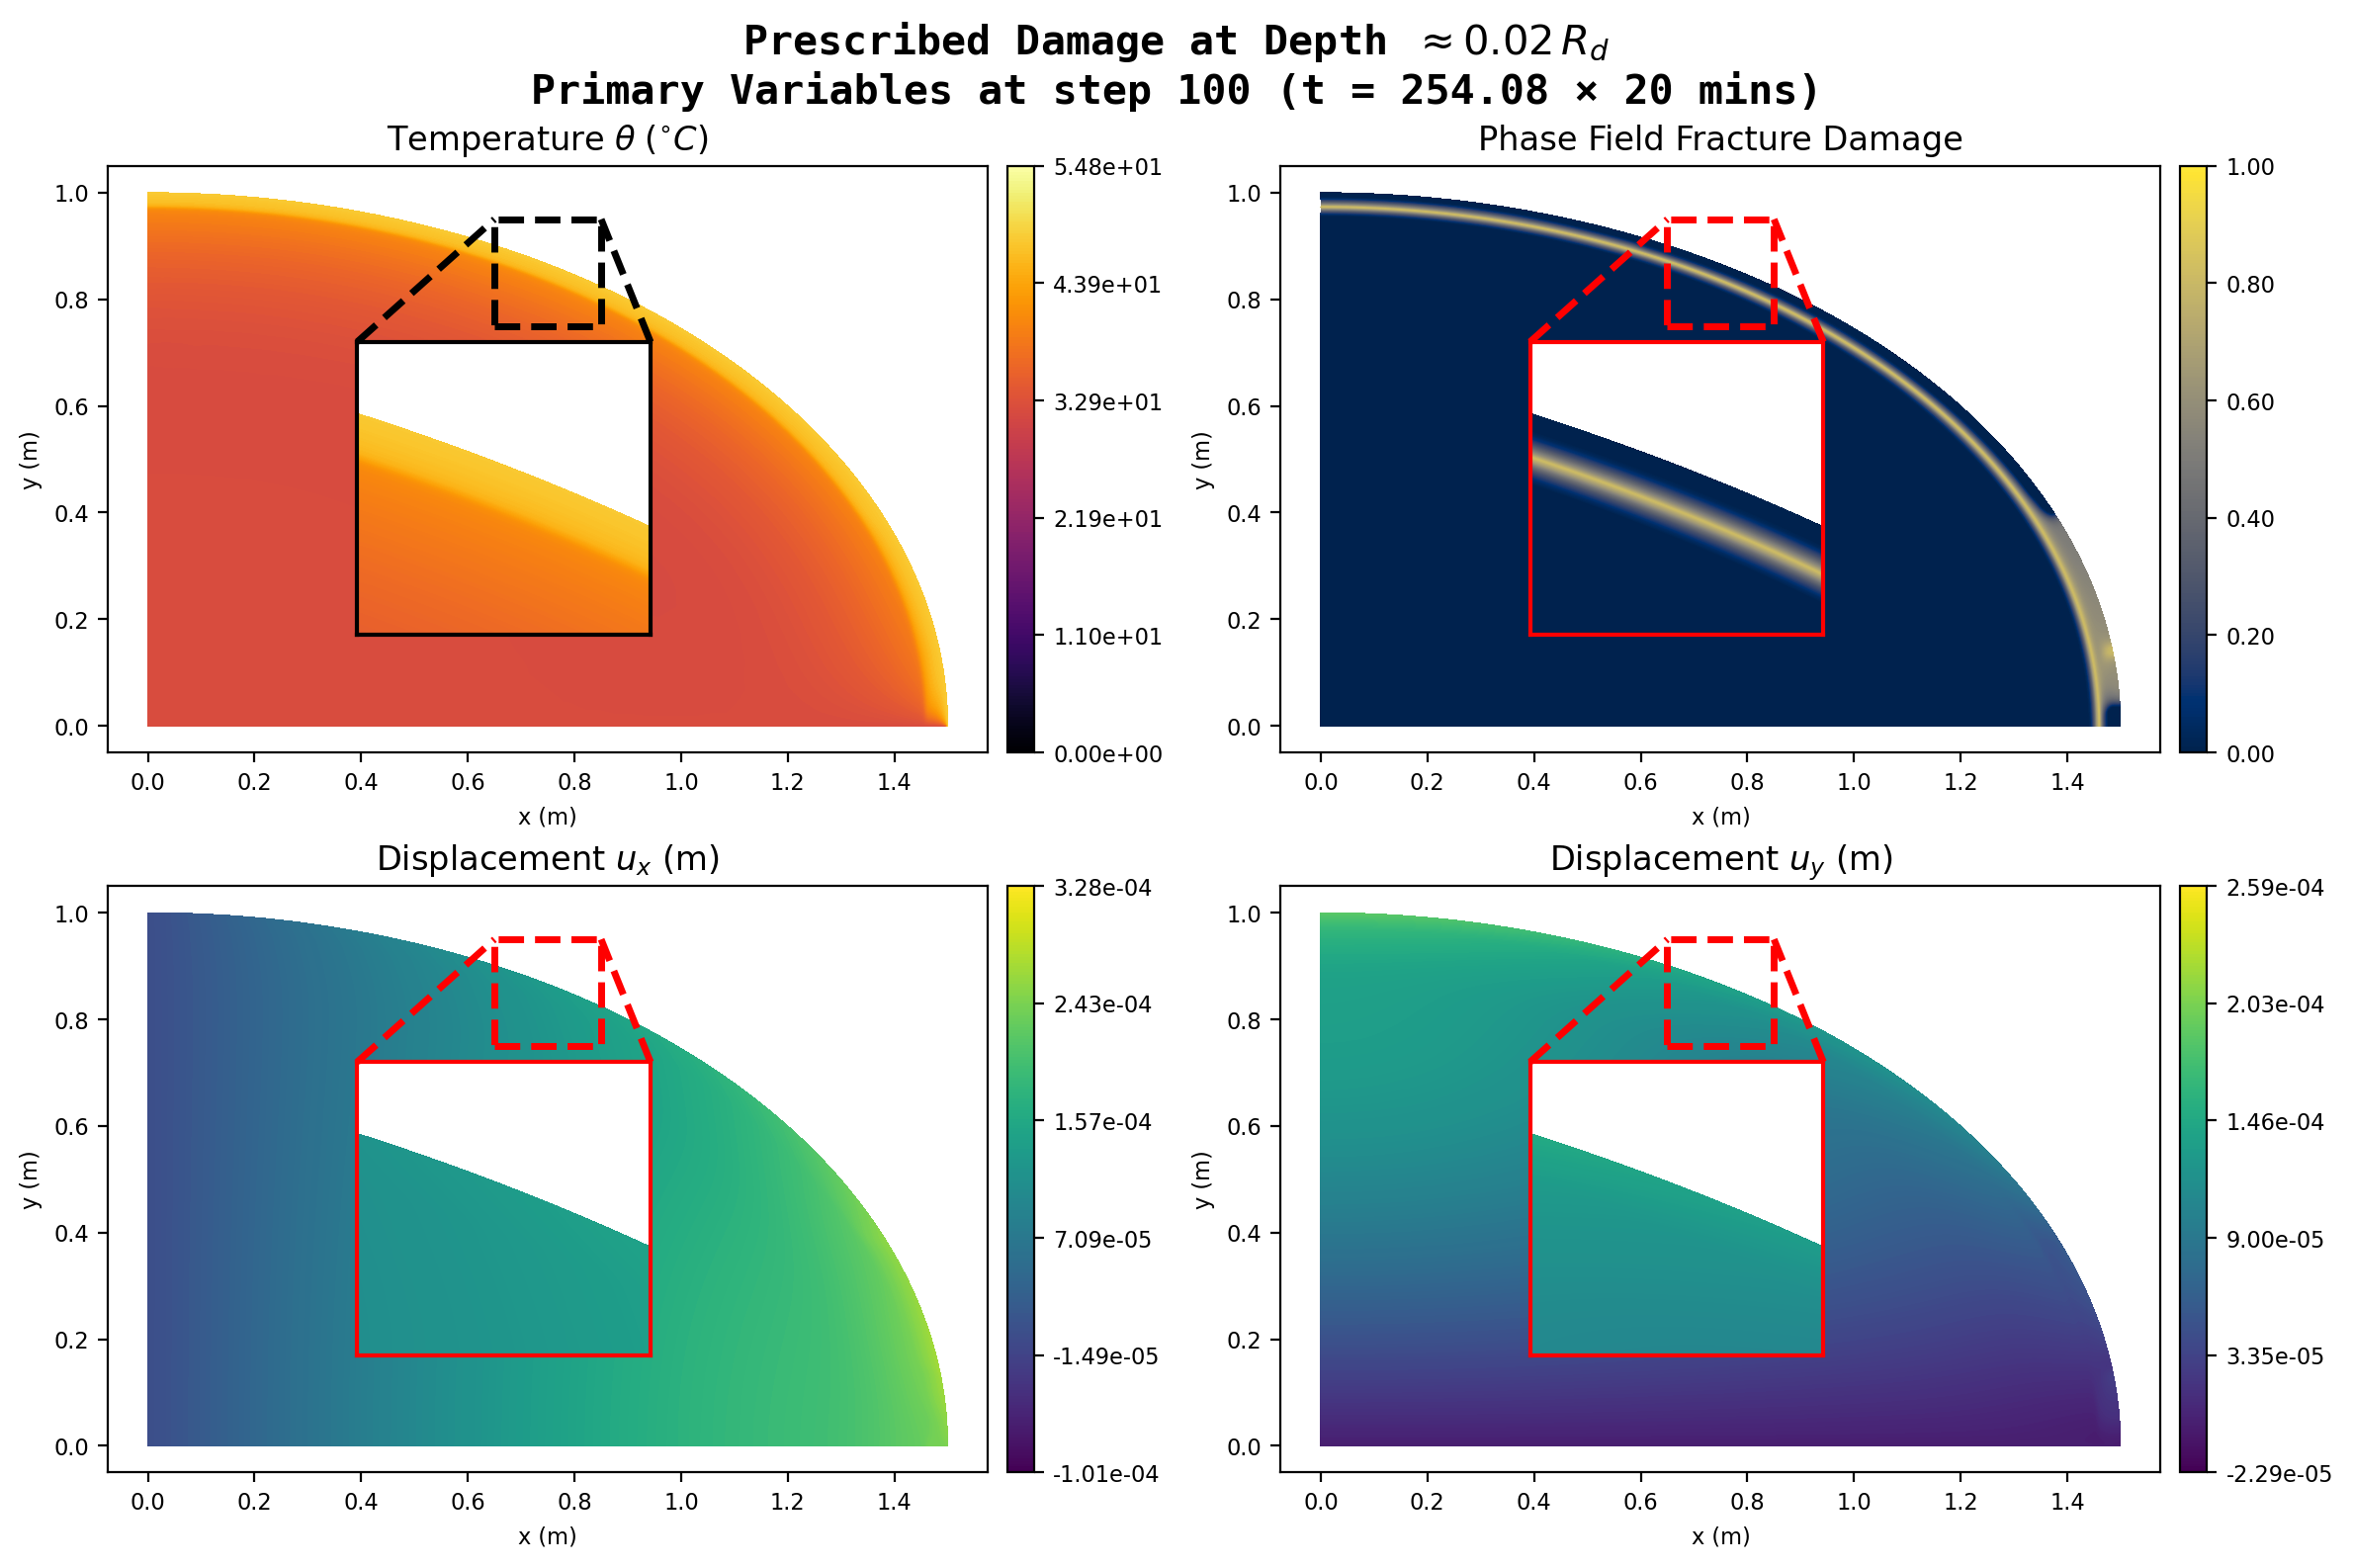

In [10]:
nr, nc = 2, 2  # 子圖數量設定
n_vars = len(node_vars)
step = 100   # 固定時間點
param_idx_list = range(n_vars)  # 要畫哪些變數（你也可以自訂 list）
color_maps=['inferno','cividis','viridis','viridis']
e_notations=[True,False,True,True]
zoom_color = ['black','red','red','red']
fig, axes = plt.subplots(nr, nc, figsize=(nc * 6, nr * 4), dpi=200)
if nr * nc == 1:
    axes = [axes]
else:
    axes = axes.flatten()

fig.suptitle(
    f"{output_list[1][model_index]}\nPrimary Variables at step {step:3d} (t = {times[step]:06.2f} × 20 mins)",
    fontsize=15, fontweight="bold", fontname="DejaVu Sans Mono"
)


for i, idx in enumerate(param_idx_list):
    vmin = node_vars[param_idx_list[i]].min()
    vmax = node_vars[param_idx_list[i]].max()
    var = node_vars[idx][step]
    showNodePlot(
        nodes, global_connection, var,
        titlelabel=[node_var_labels[idx][0], node_var_labels[idx][1]],
        size=[6, 6], ax = axes[i], p_ext=[0.05, 0.05],
        colormap=color_maps[i], e_notation=e_notations[i],
        assign_bar_range=[vmin, vmax],
        x_unit=r'x (m)', y_unit=r'y (m)',
        font_adjust=1.35
    )

    x1, x2, y1, y2 = 0.65, 0.85, 0.75, 0.95  # subregion of the original image
    # 小圖（inset）
    axins = axes[i].inset_axes([0.2, 0.2, 0.5, 0.5])  # 位置固定
    showNodePlot(
        nodes, global_connection, var,
        titlelabel=["", ""],
        size=[0, 0], ax=axins, p_ext=[0, 0],  # ✅ 禁止擴張
        colormap=color_maps[i], e_notation=True,
        assign_bar_range=[vmin, vmax],
        x_unit="", y_unit="", font_adjust=0,show_cbar=False,levels_num=400
    )
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    for spine in axins.spines.values():
        spine.set_edgecolor(zoom_color[i])   # 顏色
        spine.set_linewidth(1.5)       # 線寬
        spine.set_linestyle("-")       # 線型（可選）

    mark_inset(axes[i], axins, loc1=1, loc2=2, fc="none", ec=zoom_color[i], lw=2.5, ls='--')
####################Add zoom on phase field only########################

plt.tight_layout()
plt.subplots_adjust(top=0.89)  # 留空間給 suptitle
plt.show()


In [12]:
# Gif 
frames = []
temp_filenames = []

nr, nc = 2, 2  # 子圖數量設定
n_vars = len(node_vars)
param_idx_list = range(n_vars)  # 要畫哪些變數（你也可以自訂 list）
color_maps=['inferno','cividis','viridis','viridis']
e_notations=[True,False,True,True]
zoom_color = ['black','red','red','red']

# start for loop step = 0
for step in range(len(times)):

    fig, axes = plt.subplots(nr, nc, figsize=(nc * 6, nr * 4), dpi=200)
    if nr * nc == 1:
        axes = [axes]
    else:
        axes = axes.flatten()


    #fig.suptitle(
    #    f"Primary Variables at step {step:2d} " + f"(t = {times[step]:06.4f} mm)",
    #    fontsize=25, fontweight="bold", fontname="DejaVu Sans Mono"
    #)
    fig.suptitle(
        f"{output_list[1][model_index]}\nPrimary Variables at step {step:3d} (t = {times[step]:06.2f} × 20 mins)",
        fontsize=15, fontweight="bold", fontname="DejaVu Sans Mono"
    )
    for i, idx in enumerate(param_idx_list):
        vmin = node_vars[param_idx_list[i]].min()
        vmax = node_vars[param_idx_list[i]].max()
        var = node_vars[idx][step]
        showNodePlot(
            nodes, global_connection, var,
            titlelabel=[node_var_labels[idx][0], node_var_labels[idx][1]],
            size=[6, 6], ax = axes[i], p_ext=[0.05, 0.05],
            colormap=color_maps[i], e_notation=e_notations[i],
            assign_bar_range=[vmin, vmax],
            x_unit=r'x (m)', y_unit=r'y (m)',
            font_adjust=1.35,levels_num=300
        )


        x1, x2, y1, y2 = 0.65, 0.85, 0.75, 0.95  # subregion of the original image
        # 小圖（inset）
        axins = axes[i].inset_axes([0.2, 0.2, 0.5, 0.5])  # 位置固定
        showNodePlot(
            nodes, global_connection, var,
            titlelabel=["", ""],
            size=[0, 0], ax=axins, p_ext=[0, 0],  # ✅ 禁止擴張
            colormap=color_maps[i], e_notation=True,
            assign_bar_range=[vmin, vmax],
            x_unit="", y_unit="", font_adjust=0,show_cbar=False,levels_num=420
        )
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        for spine in axins.spines.values():
            spine.set_edgecolor(zoom_color[i])   # 顏色
            spine.set_linewidth(1.5)       # 線寬
            spine.set_linestyle("-")       # 線型（可選）

        mark_inset(axes[i], axins, loc1=1, loc2=2, fc="none", ec=zoom_color[i], lw=2.5, ls='--')

    plt.tight_layout()
    plt.subplots_adjust(top=0.89)  # 留空間給 suptitle
    #plt save
    #plt close figure
    # store frame for gif
    filename = f"frame_{step:03d}.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)  # 重要：避免 memory overflow
    frames.append(imageio.imread(filename))  # imageio 已在外部定義
    temp_filenames.append(filename)  # 方便最後清理


C:\Users\aasam\AppData\Local\Temp\ipykernel_22368\786744669.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))  # imageio 已在外部定義
C:\Users\aasam\AppData\Local\Temp\ipykernel_22368\786744669.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))  # imageio 已在外部定義
C:\Users\aasam\AppData\Local\Temp\ipykernel_22368\786744669.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `

In [19]:
# **生成 GIF**
default_duration = 120
lag = 1500
cut = True
if cut:
    reduced_frames=frames[::2]+[frames[-1]]

    reduced_frames=reduced_frames[::2]+[reduced_frames[-1]]
    #reduced_frames=frames
    duration = [default_duration] * (len(reduced_frames) - 1) + [lag]
    try:
        imageio.mimsave(output_list[1][model_index].split('\\')[1]+'.gif', reduced_frames, loop=0, duration=duration)
    except:
        imageio.mimsave(output_list[1][model_index]+'.gif', reduced_frames, loop=0, duration=duration)
else:
    reduced_frames=frames
    duration = [default_duration] * (len(reduced_frames) - 1) + [lag]
    try:
        imageio.mimsave(output_list[1][model_index].split('\\')[1]+'_intact.gif', reduced_frames, loop=0, duration=duration)
    except:
        imageio.mimsave(output_list[1][model_index]+'_intact.gif', reduced_frames, loop=0, duration=duration)



In [20]:
import os
# **清除臨時文件**
for temp_file in temp_filenames:
    os.remove(temp_file)